# Task:To predict the age of abalone from the given Physical Measurements

In [1]:
## Name / Data Type / Measurement Unit / Description
### 1- Sex / nominal / -- / M, F, and I (infant)
### 2- Length / continuous / mm / Longest shell measurement
### 3- Diameter / continuous / mm / perpendicular to length
### 4- Height / continuous / mm / with meat in shell
### 5- Whole weight / continuous / grams / whole abalone
### 6- Shucked weight / continuous / grams / weight of meat
### 7- Viscera weight / continuous / grams / gut weight (after bleeding)
### 8- Shell weight / continuous / grams / after being dried
### 9- Rings / integer / -- / +1.5 gives the age in years

In [183]:

#importing the required Libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns  
from scipy import stats

%matplotlib inline

from sklearn import linear_model as lm  

from sklearn.model_selection import train_test_split

In [7]:
st=pd.read_csv("C:/Users/humai/Downloads/abalone.csv")

In [8]:
st

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [11]:
#Changing the column names for better Understanding
st.columns=["sex",'length','diameter',"height",'whole_weight',"shucked_weight","viscera_weight","shell_weight","rings"]

In [12]:
st.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [13]:
print("Shape of the colunm:")
print(st.shape)
print()
print("DataTypes of the column:")
print(st.dtypes)

Shape of the colunm:
(4177, 9)

DataTypes of the column:
sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object


In [14]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [16]:
#No values are Null
st.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [17]:
st.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [18]:
st.corr()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [19]:
st.cov()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,0.014422,0.011761,0.004157,0.054491,0.023935,0.011887,0.015007,0.215562
diameter,0.011761,0.009849,0.003461,0.045038,0.019674,0.009787,0.012507,0.183872
height,0.004157,0.003461,0.001750,0.016803,0.007195,0.003660,0.004759,0.075179
whole_weight,0.054491,0.045038,0.016803,0.240481,0.105518,0.051946,0.065216,0.854409
shucked_weight,0.023935,0.019674,0.007195,0.105518,0.049268,0.022675,0.027271,0.301204
viscera_weight,0.011887,0.009787,0.003660,0.051946,0.022675,0.012015,0.013850,0.178057
shell_weight,0.015007,0.012507,0.004759,0.065216,0.027271,0.013850,0.019377,0.281663
rings,0.215562,0.183872,0.075179,0.854409,0.301204,0.178057,0.281663,10.395266


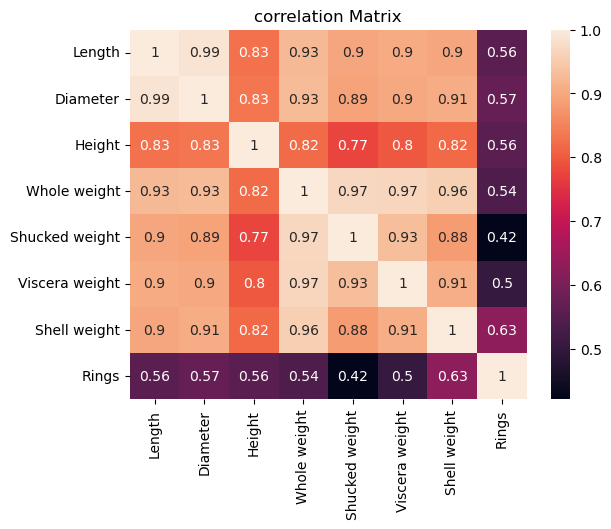

In [20]:
sns.heatmap(df.corr(),annot=True)
plt.title("correlation Matrix")
plt.show()

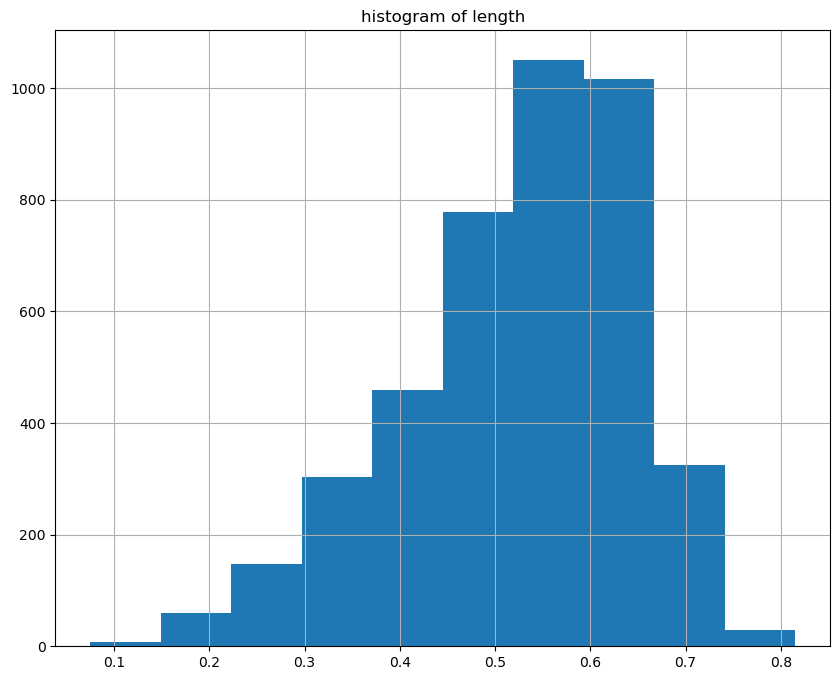

In [22]:
st['length'].hist(bins=10,figsize=(10,8))
plt.title("histogram of length")
plt.show()

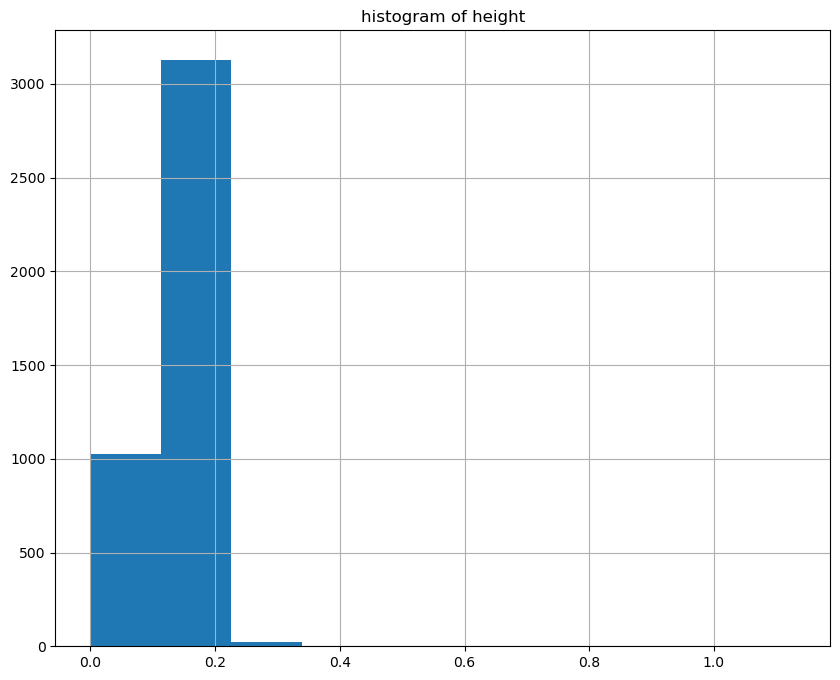

In [24]:
st['height'].hist(bins=10,figsize=(10,8))
plt.title("histogram of height")
plt.show()

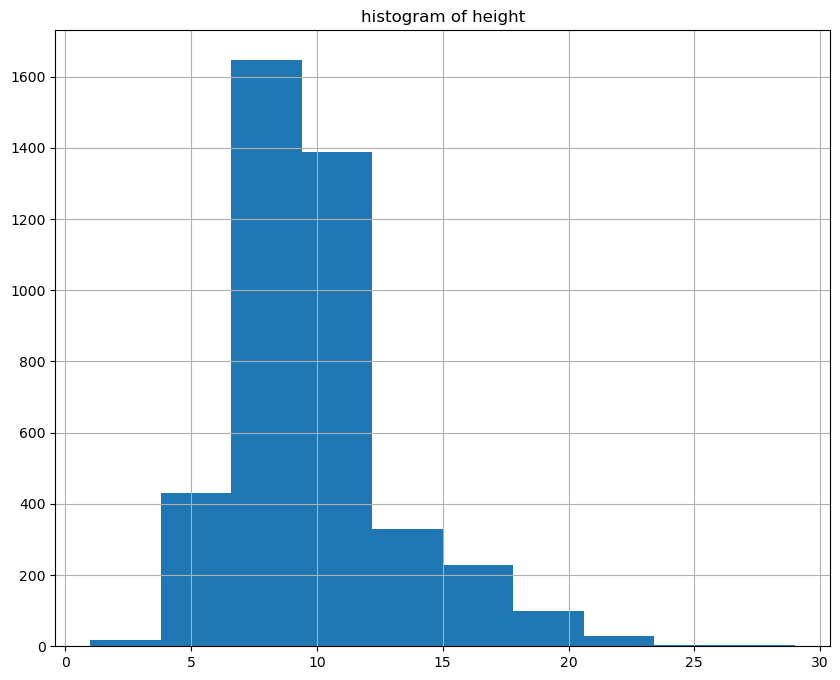

In [25]:
st['rings'].hist(bins=10,figsize=(10,8))
plt.title("histogram of height")
plt.show()

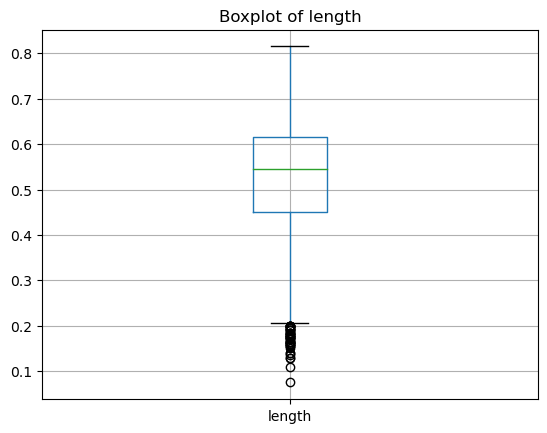

In [26]:
st.boxplot(column="length")
plt.title("Boxplot of length")
plt.show()

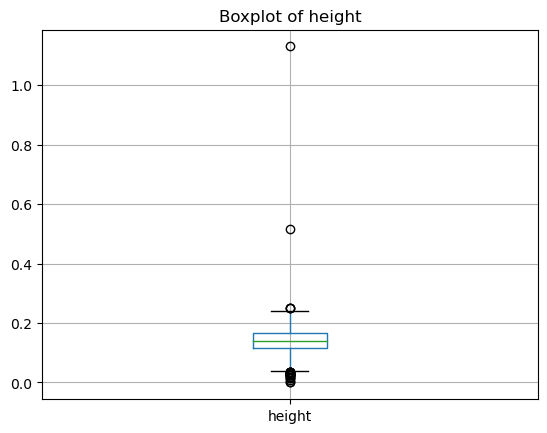

In [27]:
st.boxplot(column="height")
plt.title("Boxplot of height")
plt.show()

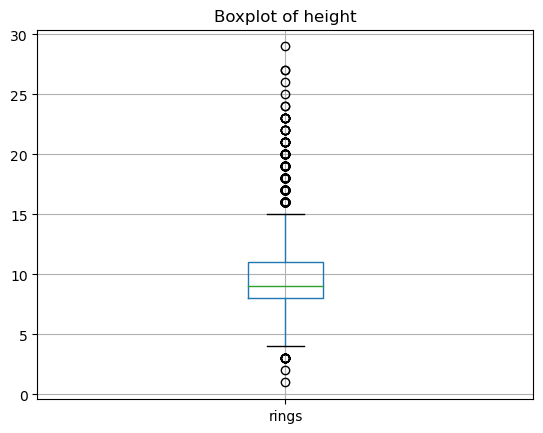

In [28]:
st.boxplot(column="rings")
plt.title("Boxplot of height")
plt.show()

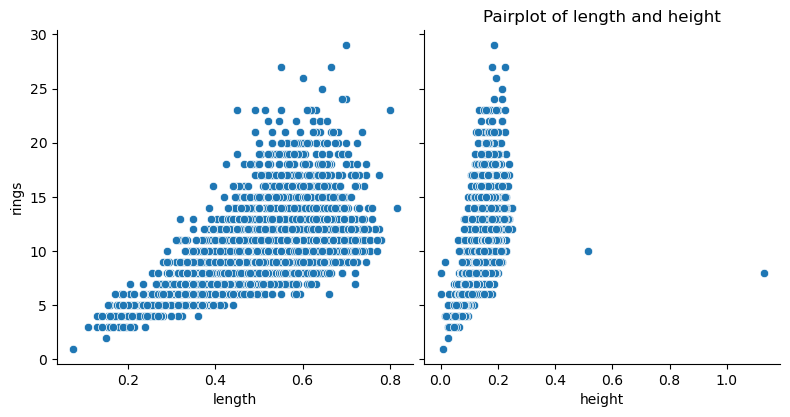

In [29]:
sns.pairplot(st,x_vars=['length','height'],y_vars='rings',height=4)
plt.title("Pairplot of length and height")
plt.show()

C:\Users\humai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length', ylabel='Density'>

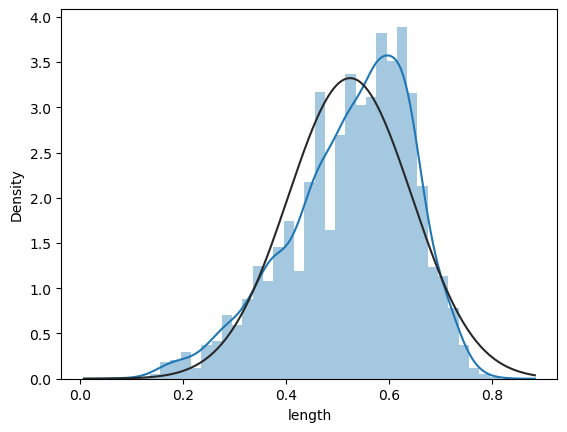

In [30]:
sns.distplot(st['length'],fit=stats.norm)

C:\Users\humai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height', ylabel='Density'>

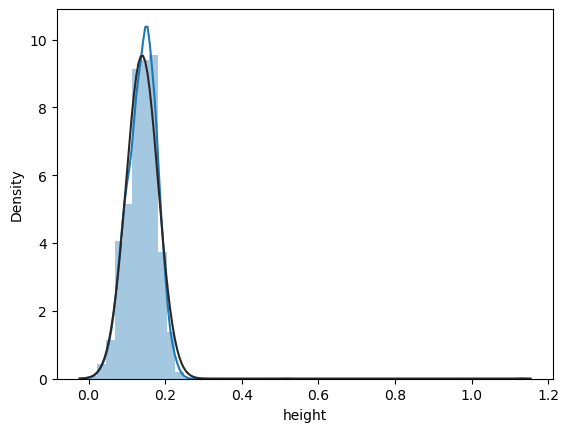

In [31]:
sns.distplot(st['height'],fit=stats.norm)

C:\Users\humai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rings', ylabel='Density'>

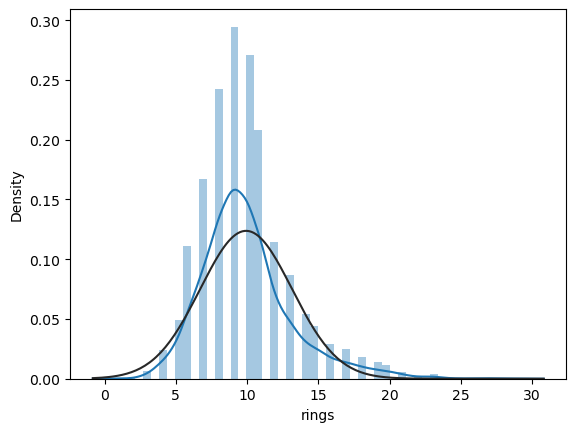

In [32]:
sns.distplot(st['rings'],fit=stats.norm)

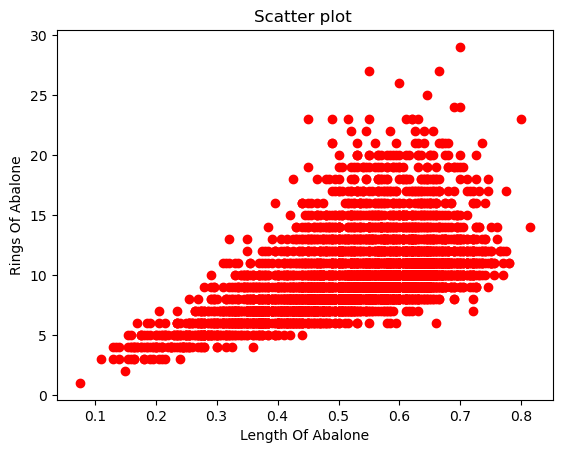

In [33]:
x=st['length']
y=st['rings']
plt.scatter(x,y,c="red")
plt.title("Scatter plot ")
plt.xlabel("Length Of Abalone")
plt.ylabel("Rings Of Abalone")
plt.show()

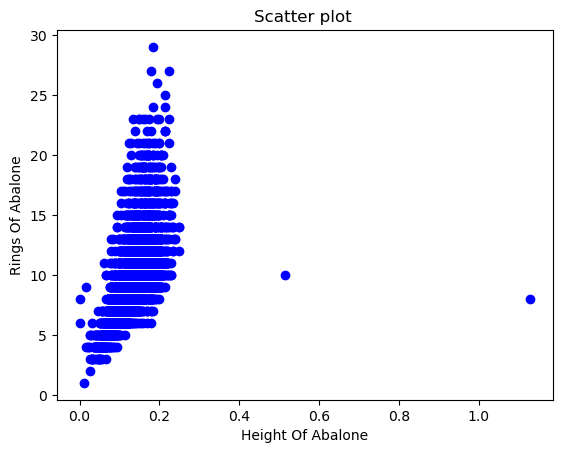

In [34]:
x=st['height']
y=st['rings']
plt.scatter(x,y,c="blue")
plt.title("Scatter plot ")
plt.xlabel("Height Of Abalone")
plt.ylabel("Rings Of Abalone")
plt.show()

In [35]:
len=st["length"]

heg=st["height"]

ring=st["rings"]

Text(0.5, 1.0, 'pairplot')

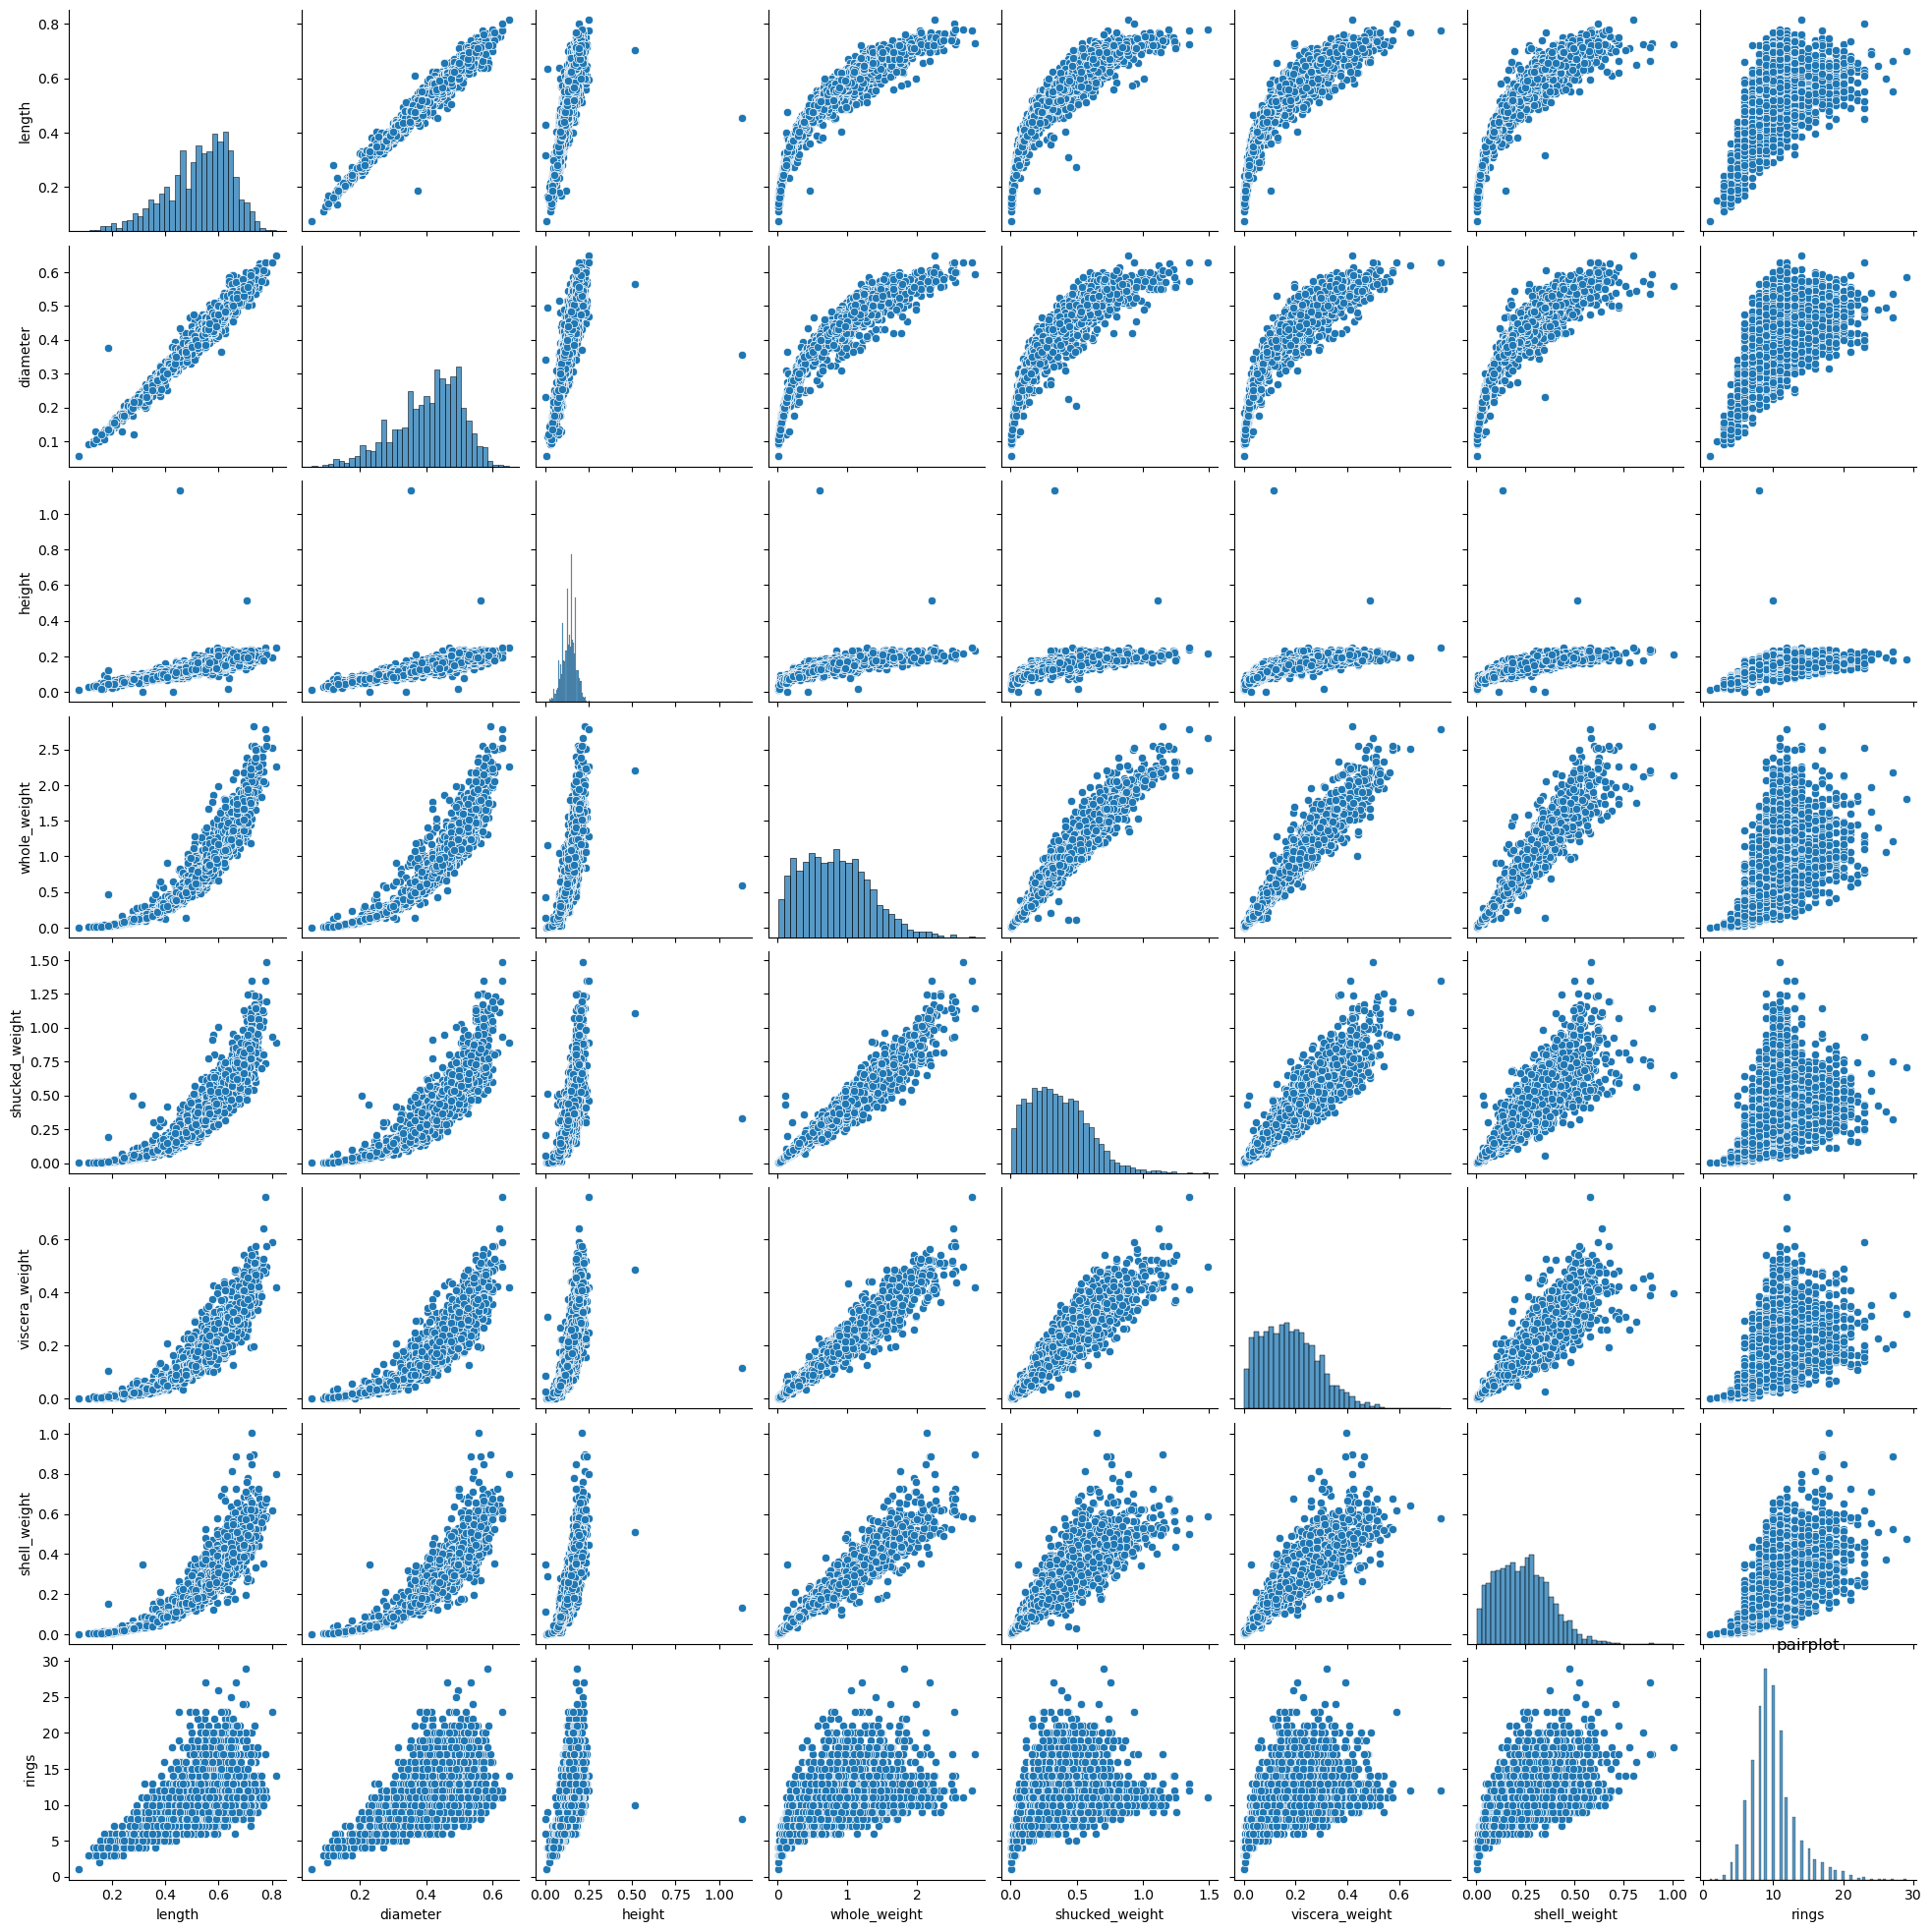

In [36]:
sns.pairplot(st)
plt.title("pairplot")

In [37]:
#Regression model using simple basic stat
import statsmodels.api as sm
model=sm.OLS(ring,len).fit()

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  rings   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                          5.744e+04
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                        0.00
Time:                        23:39:18   Log-Likelihood:                         -10105.
No. Observations:                4177   AIC:                                  2.021e+04
Df Residuals:                    4176   BIC:                                  2.022e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
length        18.7576      0.078    239.669      0.000      18.604      18.911
==============================================================================
Omnibus:                     1183.909   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3337.687
Skew:                           1.488   Prob(JB):                         0.00
Kurtosis:                       6.213   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Encoding process:

# one Hot encoding :

data_encoded_st=pd.get_dummies(st)

In [43]:
data_encoded_st.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [44]:
data_encoded_st.tail()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0
4176,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12,0,0,1


In [45]:
data_encoded_st.shape

(4177, 11)

In [46]:
# spliting the data:

train_data=data_encoded_st.iloc[:4095,:] 
validate_data=data_encoded_st.iloc[4095:,:]

print(train_data.shape)
print(validate_data.shape)

(4095, 11)
(82, 11)


In [238]:
x=train_data[["length","height"]]

In [239]:
y=train_data["rings"].values.reshape(-1,1)

y

array([[15],
       [ 7],
       [ 9],
       ...,
       [11],
       [11],
       [13]], dtype=int64)

In [240]:
x_val=validate_data[["length","height"]]

In [241]:
y_val=validate_data['rings'].values.reshape(-1,1)
y_val

array([[11],
       [12],
       [ 9],
       [ 9],
       [ 9],
       [ 9],
       [11],
       [11],
       [10],
       [11],
       [ 9],
       [11],
       [ 7],
       [ 7],
       [ 8],
       [ 9],
       [ 8],
       [ 9],
       [ 8],
       [ 9],
       [10],
       [ 9],
       [ 9],
       [ 9],
       [ 4],
       [ 7],
       [ 9],
       [ 8],
       [ 8],
       [ 8],
       [ 9],
       [11],
       [10],
       [ 8],
       [10],
       [10],
       [11],
       [10],
       [11],
       [ 9],
       [11],
       [ 9],
       [11],
       [11],
       [10],
       [10],
       [11],
       [13],
       [13],
       [11],
       [11],
       [10],
       [11],
       [11],
       [ 6],
       [ 7],
       [ 6],
       [ 7],
       [ 8],
       [ 6],
       [ 6],
       [ 8],
       [ 8],
       [ 8],
       [ 9],
       [11],
       [11],
       [ 8],
       [ 7],
       [ 7],
       [ 7],
       [10],
       [ 9],
       [ 8],
       [10],
       [10],
       [ 8],

In [263]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [264]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X_train,y_train)

In [265]:
model

LinearRegression()

In [266]:
accuracy = model.score(X_train, y_train) # SCORE is used to find the accuracy
print('Accuracy of the model:', accuracy)  

Accuracy of the model: 0.36581011994528945


In [267]:
print('intercept:', model.intercept_)


print('slope:', model.coef_)

intercept: [2.64439172]
slope: [[ 2.32992228 43.66562768]]


In [268]:
# model testing
X_test

,length,height
2374,0.435,0.110
2184,0.320,0.080
1139,0.575,0.165
91,0.555,0.150
3625,0.670,0.195
...,...,...
2619,0.690,0.185
2750,0.510,0.145
3277,0.465,0.140
1235,0.375,0.085


In [269]:
X_test.shape

(410, 2)

In [270]:
y_test.shape

(410, 1)

In [271]:
X_test = X_test.values.reshape((-1,1))

In [278]:
## Predictions from the model
prediction  =  model.predict(x)

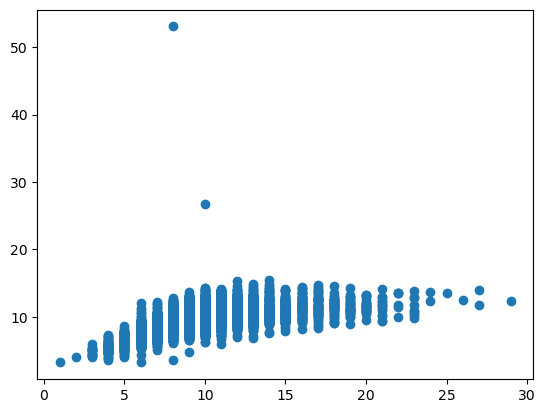

In [282]:
#visualizing the predicted model
plt.scatter(y, prediction)

In [281]:
# Giving new data values to the model to predict
X_new_val = [[30,45]]

#Make a Prediction
y_new_val = model.predict(X_new_val)

print(X_new_val ,y_new_val)

[[30, 45]] [[2037.49530562]]


C:\Users\humai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# metrics

In [297]:

test_rmse=mean_squared_error(y,prediction,squared=False)

In [298]:
print(f"Test rmse:{test_rmse}")

Test rmse:2.678563830724712


In [299]:
lm_predict_val= model.predict(x_val)

val_rmse=mean_squared_error(y_val,lm_predict_val,squared=False)

print(f"validation of rmse:{val_rmse}")

validation of rmse:1.5993769078684155
